# Data Analysis in Python with IPL Dataset (Group 22)
## Submitted By -
### Mohitveer Singh Sandhu (16BCS4011)


## Problem Questions and Results

[1. How many matches we’ve got in the dataset?](#How-many-matches-we’ve-got-in-the-dataset?)

[2. How many seasons we’ve got in the dataset?](#How-many-seasons-we’ve-got-in-the-dataset?)

[3. Which Team had won by maximum runs and by how many runs?](#Which-Team-had-won-by-maximum-runs-and-by-how-many-runs?)

[4. Which Team had won by maximum wicket and by how many wickets?](#Which-Team-had-won-by-maximum-wickets-and-by-how-many-wickets?)

[5. Which Team had won by closest Margin (minimum runs)?](#Which-Team-had-won-by-(closest-margin)-minimum-runs?)

[6. Which Team had won by minimum wicket?](#Which-Team-had-won-by-minimum-wickets?)

[7. Which Season had most number of matches?](#Which-season-had-most-number-of-matches?)

[8. Which IPL Team is more successful?](#Which-IPL-Team-is-more-successful?)

[9. Top player of the match Winners](#Top-player-of-the-match-Winners)

[10. Has Toss-winning helped in winning matches?](#Has-Toss-winning-helped-in-Match-winning?)

[11. Number of Matches at each venue](#Number-of-matches-at-each-venue)

[12. Number of Matches played by each team](#Number-of-matches-played-by-each-team)

[13. Champions Each Season](#Champions-each-season)

[14. Toss Decisions](#Toss-Decisions)

[15. Top Umpires](#Top-Umpires)

[16. Batsman Analysis](#Batsman-Analysis)

[17. Bowler Analysis](#Bowler-Analysis)

### Loading Required Libraries

In [245]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #modern visualization

To make our plots look nice, let us set a theme for our seaborn (sns) plots and also let us define the size in which we would like to print the plot figures.

In [183]:
sns.set_style("darkgrid")
plt.rcParams.update({'figure.figsize' : (18, 10), 'font.size':16})

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Reading input datasets

In [84]:
file_name1 = 'matches.csv'
file_name2 = 'deliveries.csv'
matches = pd.read_csv(file_name1)
deliveries = pd.read_csv(file_name2)

### Get basic information of Data

In [6]:
matches.shape

(636, 18)

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [9]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [85]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [87]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [89]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [90]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### How many matches we’ve got in the dataset?

In [11]:
matches['id'].max()

636

### How many seasons we’ve got in the dataset?

In [228]:
seasons = matches['season'].unique()
print(seasons)

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [91]:
len(seasons)

10

### Which Team had won by maximum runs and by how many runs?

In [16]:
team_won_by_max_scores = matches.iloc[matches['win_by_runs'].idxmax()]
print(team_won_by_max_scores)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [18]:
team_won_by_max_scores['winner']

'Mumbai Indians'

In [19]:
team_won_by_max_scores['win_by_runs']

146

### Which Team had won by maximum wickets and by how many wickets?

In [24]:
team_won_by_max_wickets = matches.iloc[matches['win_by_wickets'].idxmax()]
print(team_won_by_max_wickets)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [25]:
team_won_by_max_wickets['winner']

'Kolkata Knight Riders'

In [26]:
team_won_by_max_wickets['win_by_wickets']

10

### Which Team had won by (closest margin) minimum runs?
To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we apply a simple workaround as you can see below.

In [37]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [36]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Which Team had won by minimum wickets?

In [93]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Which season had most number of matches?

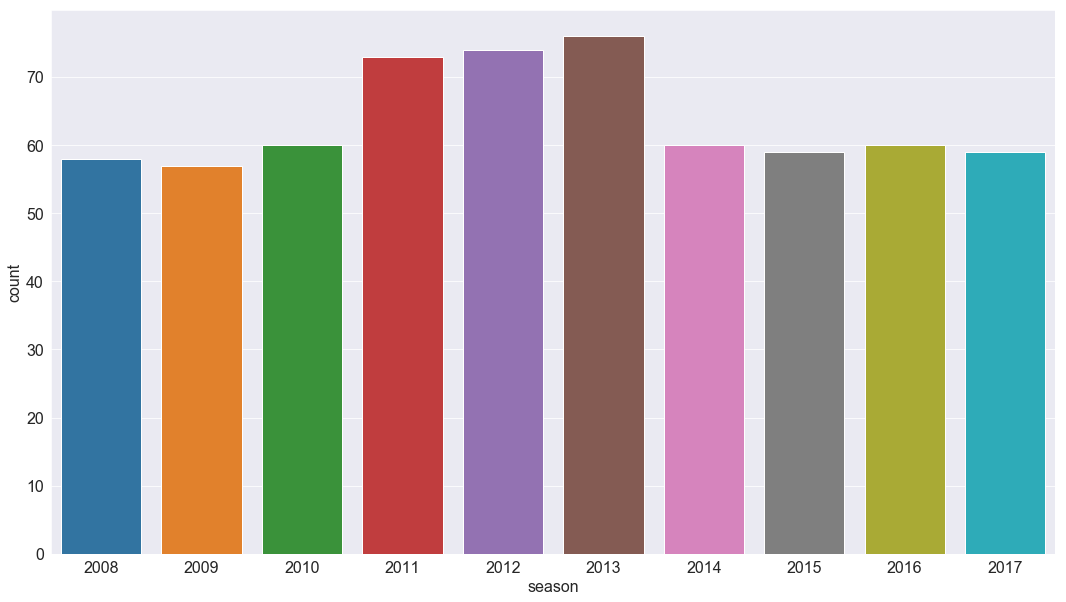

In [190]:
sns.countplot(x='season', data=matches)
plt.show()

There is a spike in the middle for three years where the number of matches are more than 70.

### Which IPL Team is more successful?

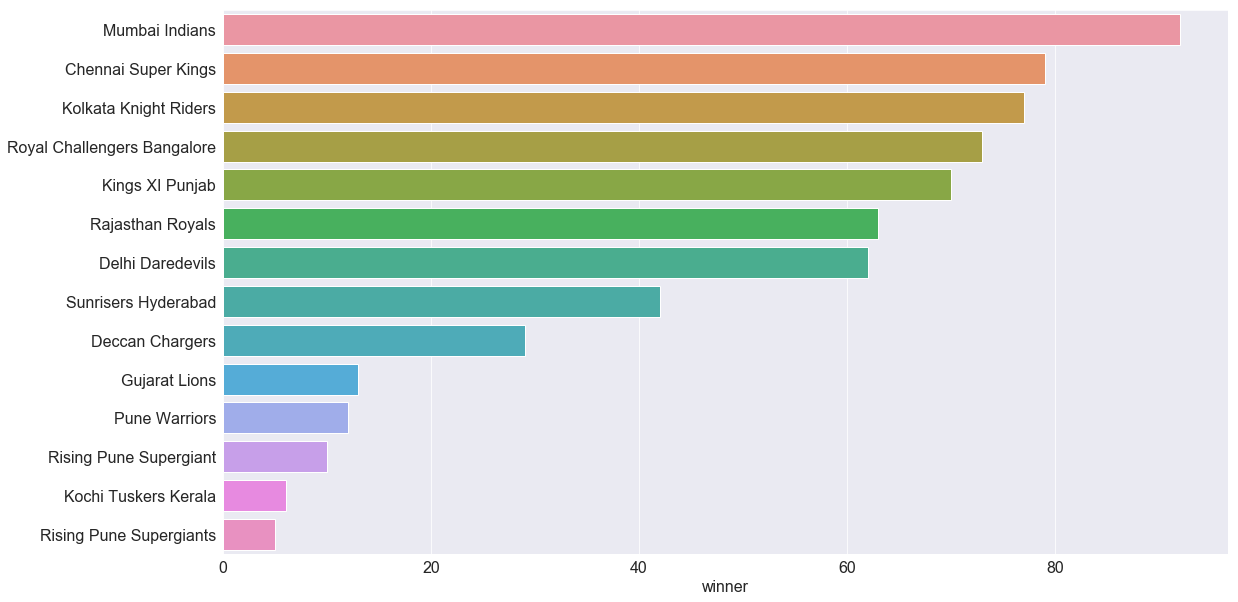

In [203]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

"Mumbai Indians" leads the pack followed by "Chennai Super Kings".

### Top player of the match Winners

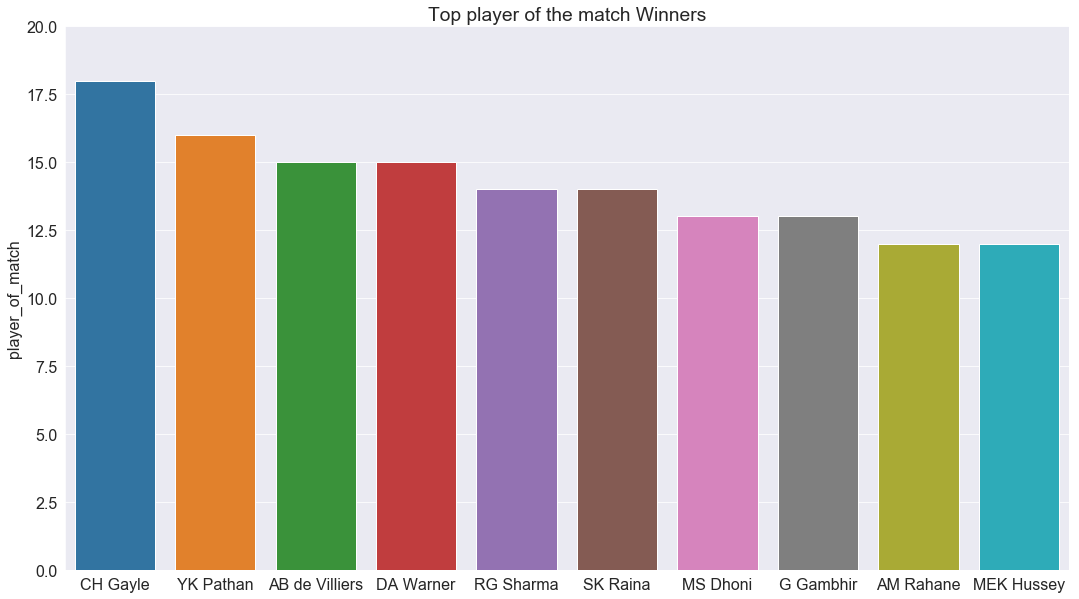

In [166]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v')
plt.show()

### Has Toss-winning helped in Match-winning?

In [167]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


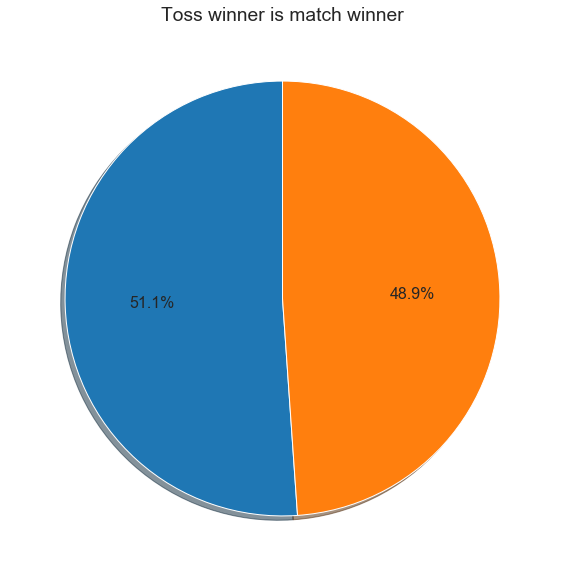

In [219]:
matches['toss_winner_is_winner'] = 'no'
matches['toss_winner_is_winner'].ix[matches.toss_winner == matches.winner] = 'yes'
temp_series = matches.toss_winner_is_winner.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

It is not really the case it seems. The chance is 50-50 for both the teams.

Let us also look at the team wise break up. If the team wins the toss, will it end up in the winning side. Will be interesting to see.

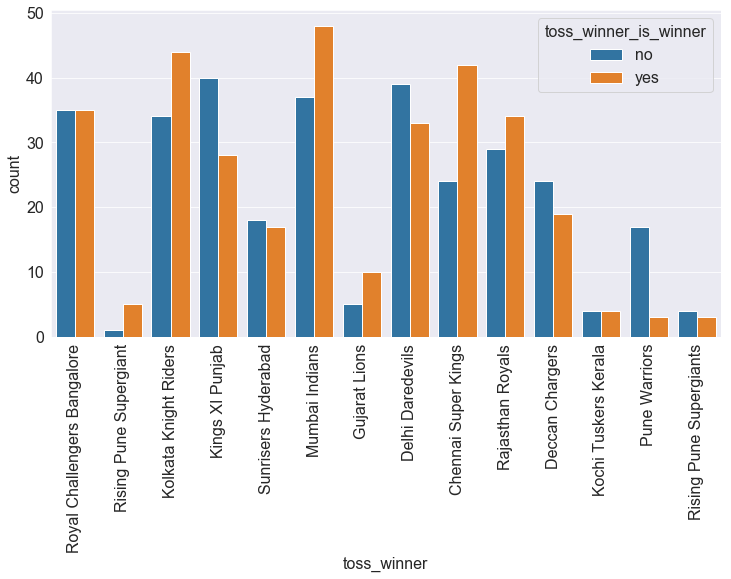

In [222]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=matches)
plt.xticks(rotation='vertical')
plt.show()

It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.

On the other hand, Pune Warriors end up losing the matches more often when they won the toss.

### Number of matches at each venue

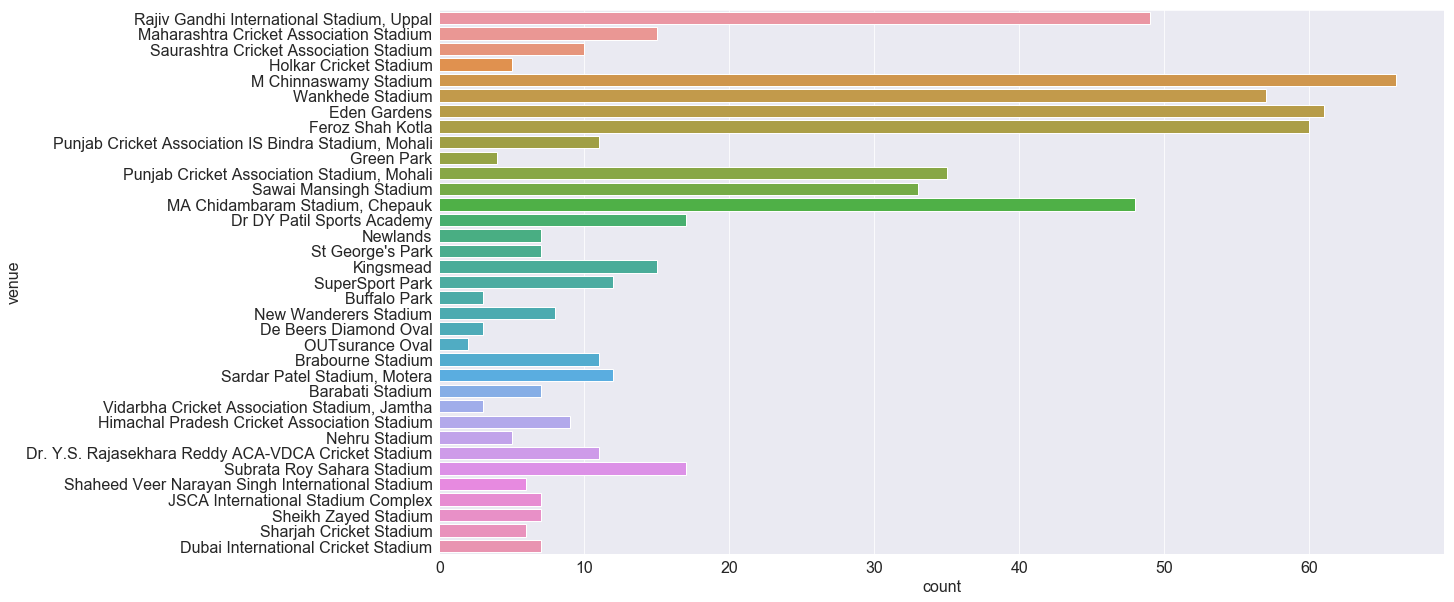

In [212]:
sns.countplot(y='venue', data=matches)
plt.yticks(rotation='horizontal')
plt.show()

There are quite a few venues present in the data with "M Chinnaswamy Stadium" being the one with most number of matches followed by "Eden Gardens".

### Number of matches played by each team

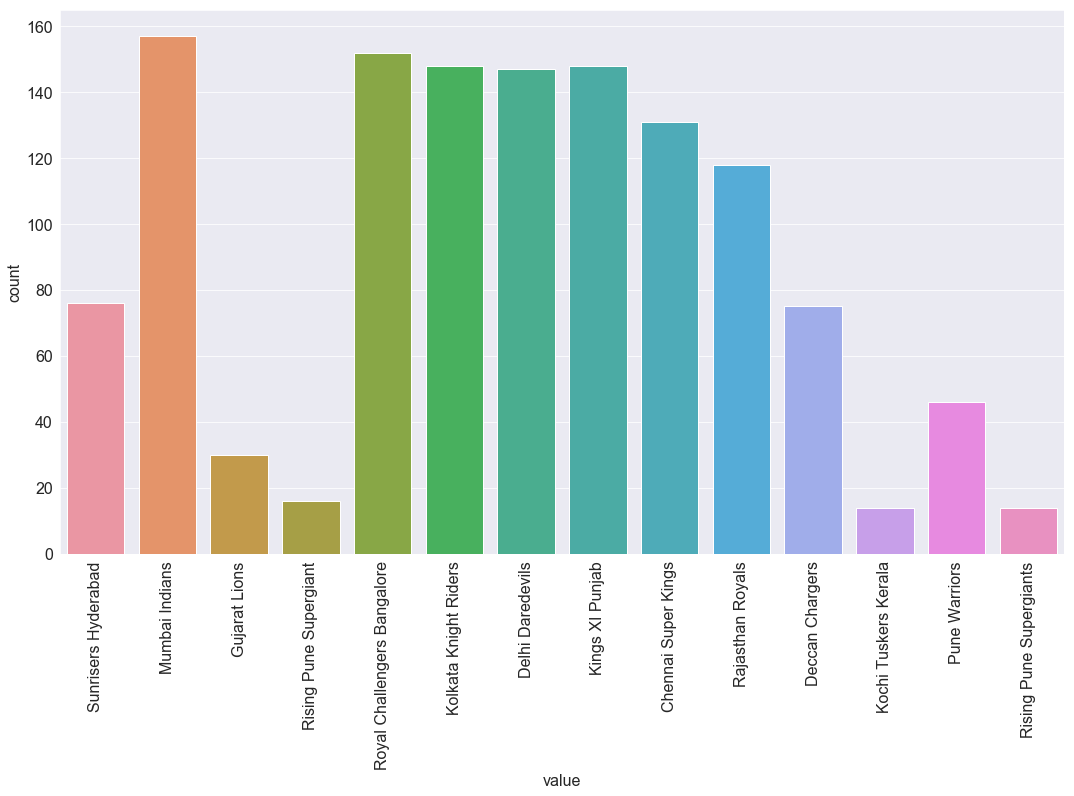

In [206]:
temp_df = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(18,10))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

"Mumbai Indians" lead the pack with most number of matches played followed by "Royal Challengers Bangalore". There are also teams with very few matches like 'Rising Pune Supergiants', 'Gujarat Lions' as they are new teams that came in only last season.

### Champions each season

In [171]:
temp_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Toss Decisions

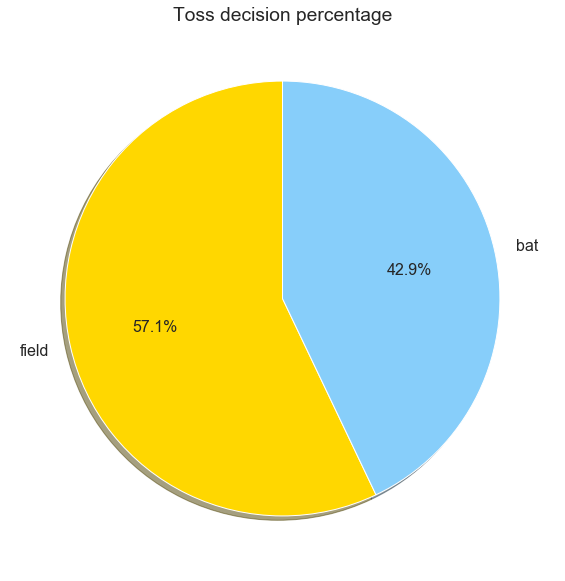

In [172]:
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Almost 55% of the toss decisions are made to field first. Now let us see how this decision varied over time.

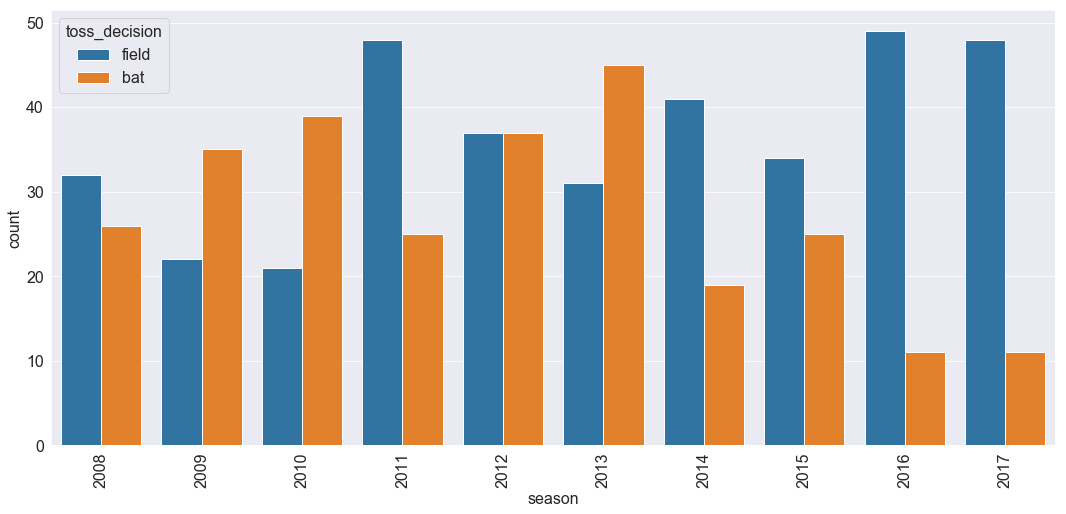

In [173]:
plt.figure(figsize=(18,8))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

It seems during the initial years, teams wanted to bat first. Voila.! Look at the 2016 season, most of the toss decisions are to field first.

Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

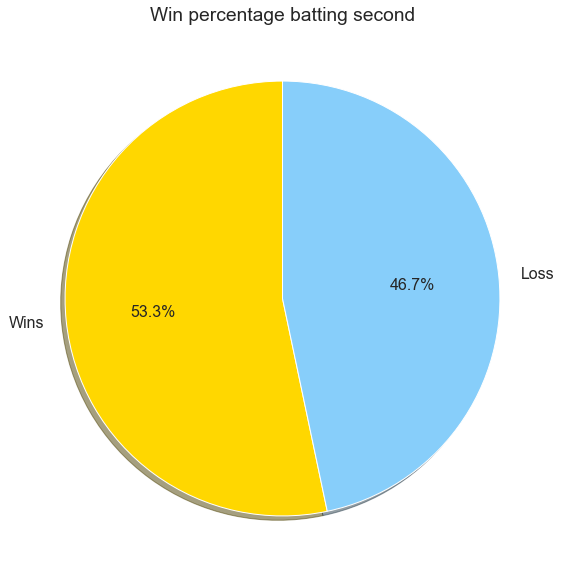

In [175]:
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


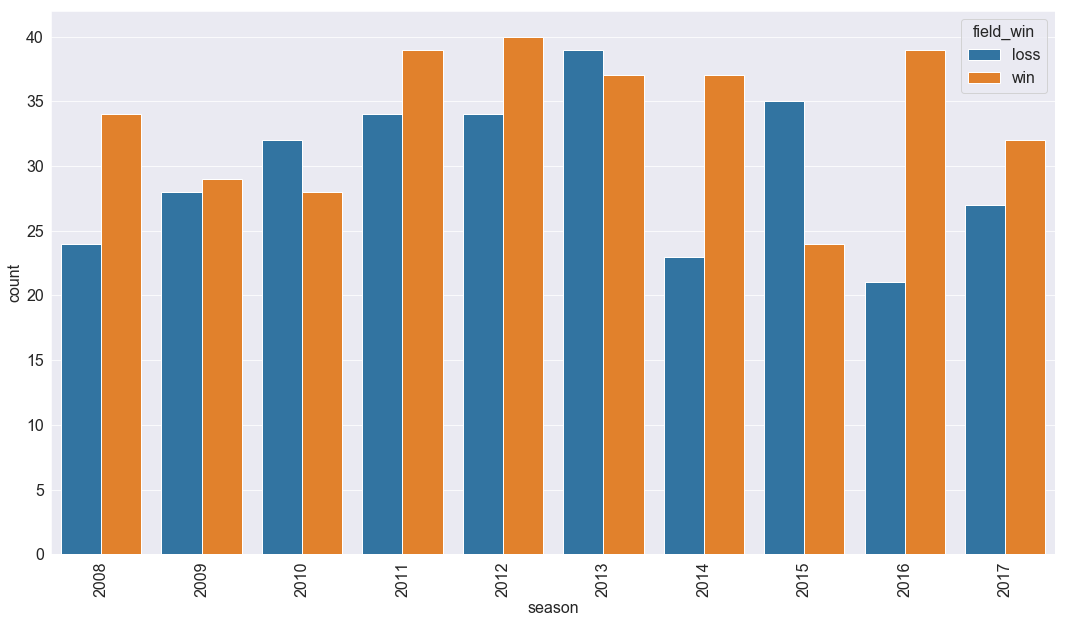

In [180]:
matches["field_win"] = "win"
matches["field_win"].ix[matches['win_by_wickets']==0] = "loss"
sns.countplot(x='season', hue='field_win', data=matches)
plt.xticks(rotation='vertical')
plt.show()

Number of wins batting second is also quite high in the latest season (2016) while in 2015 teams batting first has won more than batting second.

### Top Umpires

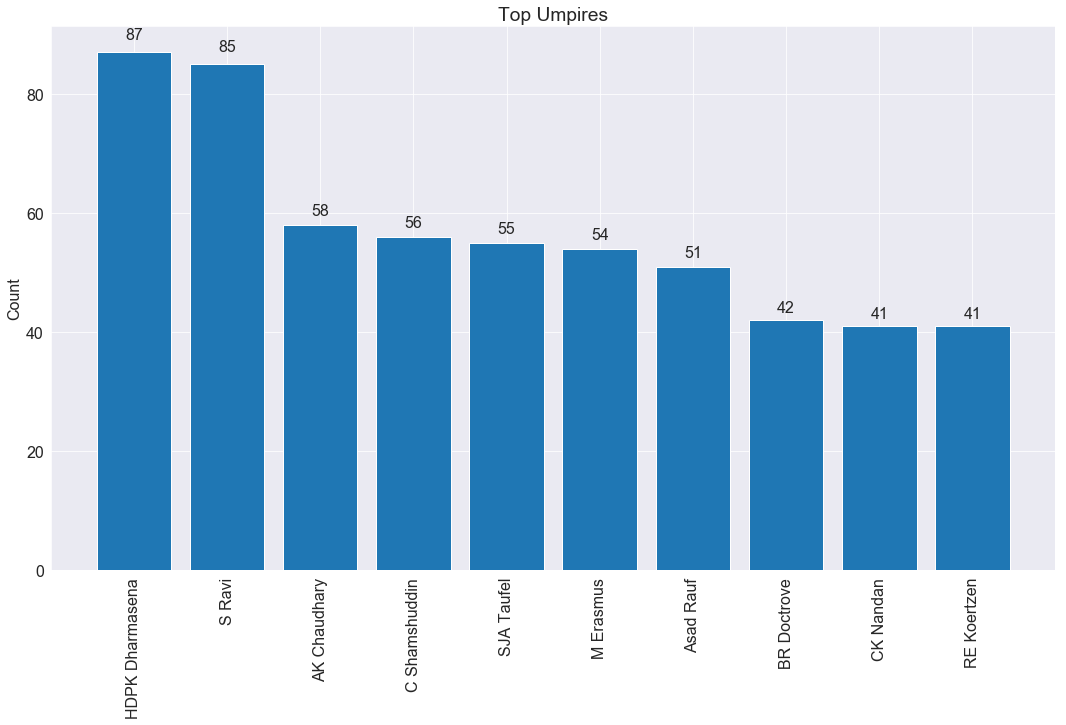

In [204]:
temp_df = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

Dharmasena seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.

#### So far we have looked at the match data to get insights. Now let us look at the delivery dataset which is more granular to gain some more insights.

## Batsman Analysis

Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

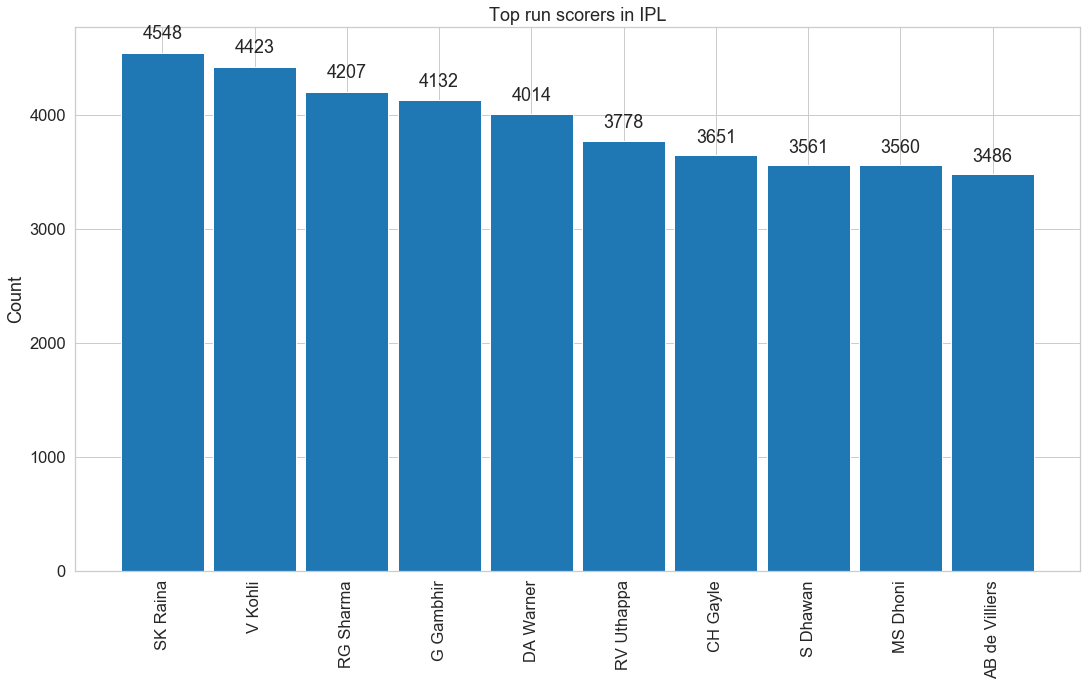

In [257]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

Suresh Raina is leading the chart followed closely by Virat Kohli. Warner is the top scorer among foreign players.

Now let us see the players with more number of boundaries(4's) in IPL.

Text(0.5, 1.0, 'Batsman with most number of boundaries.!')

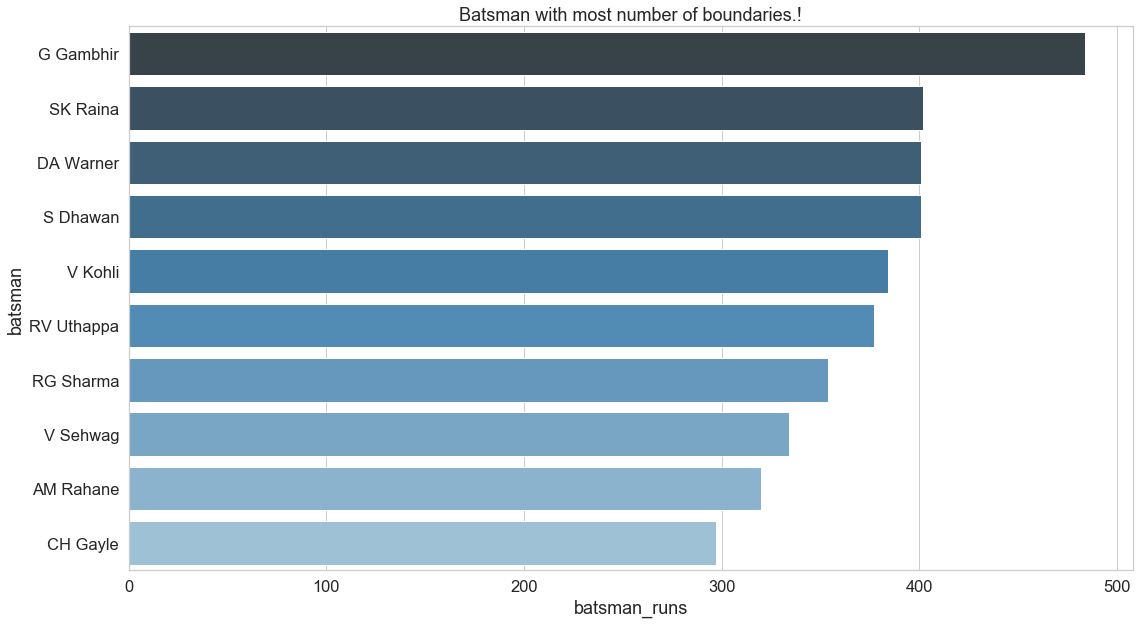

In [287]:
data = deliveries[(deliveries['batsman_runs'] == 4)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Blues_d")
ax.set_title("Batsman with most number of boundaries.!")

Gambhir is way ahead of others followed by Raina.

Now let us check the number of 6's

Text(0.5, 1.0, 'Batsman with most number of sixes.!')

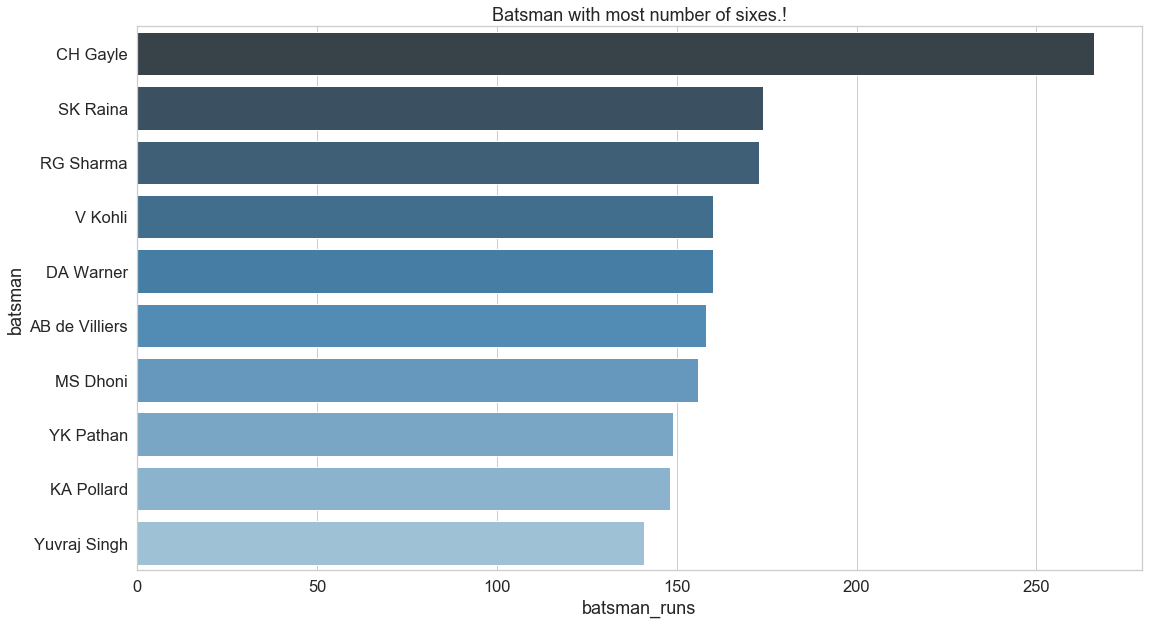

In [288]:
data = deliveries[(deliveries['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Blues_d")
ax.set_title("Batsman with most number of sixes.!")

There you see the big man. Gayle, the unassailable leader in the number of sixes.

Raina is second in 6's

Now let us see the batsman who has played the most number of dot balls.

Text(0.5, 1.0, 'Batsman with most number of dot balls.!')

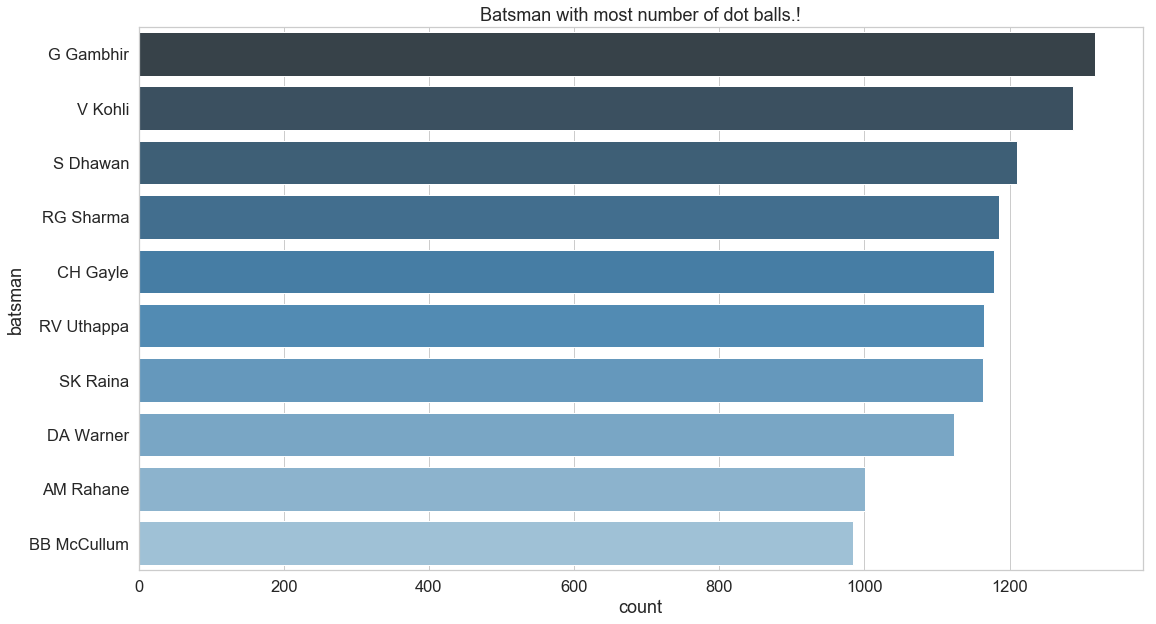

In [289]:
data = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10], palette="Blues_d")
ax.set_xlabel("count")
ax.set_title("Batsman with most number of dot balls.!")

It is interesting to see that the almost same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


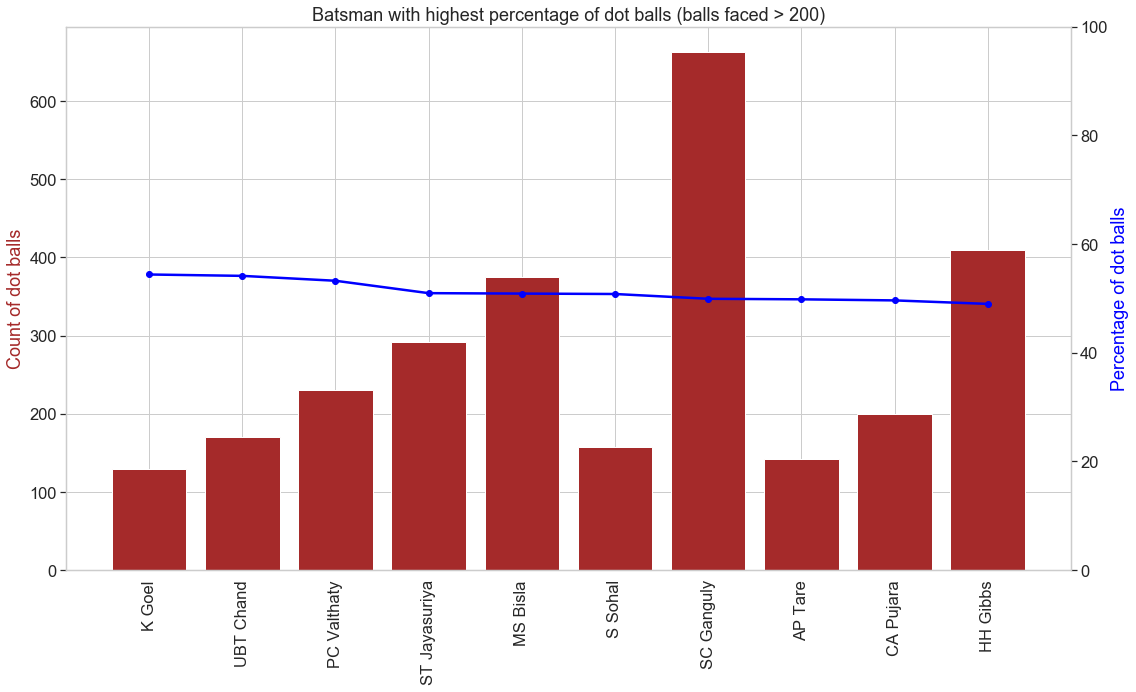

In [290]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = deliveries.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.ix[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), color='brown')
ax1.set_xticks(ind)
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

Batsman with more than 200 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like Jayasuriya and Gibbs in there.!

## Bowler Analysis

Now let us see the bowlers who has bowled most number of balls in IPL.

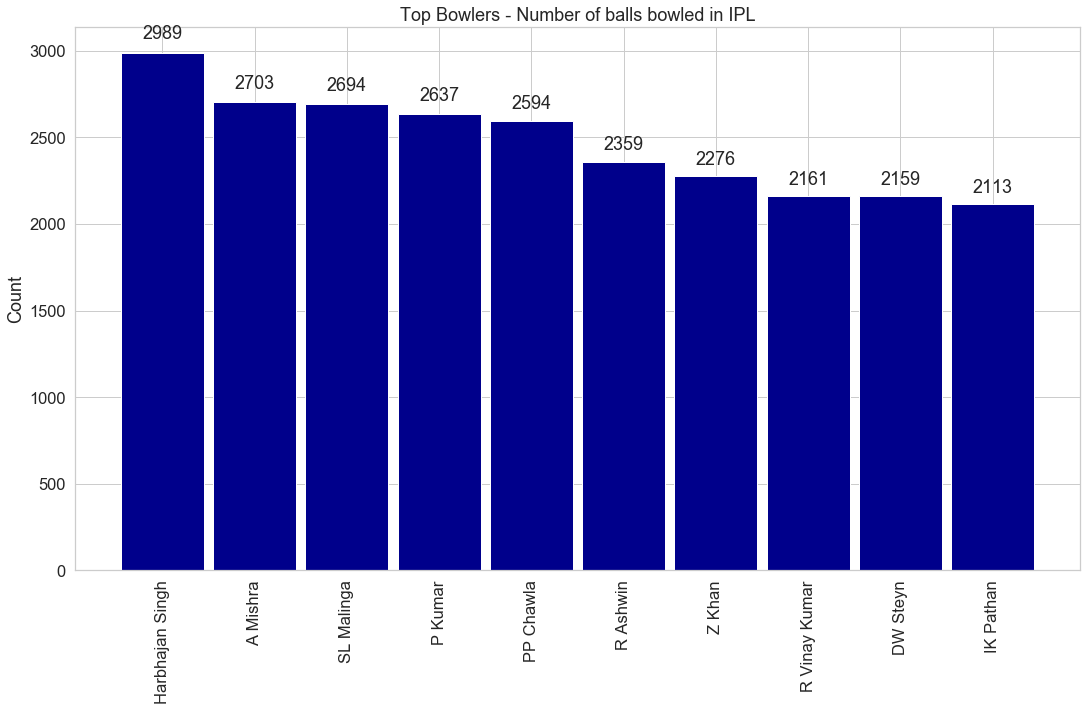

In [293]:
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='darkblue')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
autolabel(rects)
plt.show()

Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

Text(0.5, 1.0, 'Top Bowlers - Number of dot balls bowled in IPL')

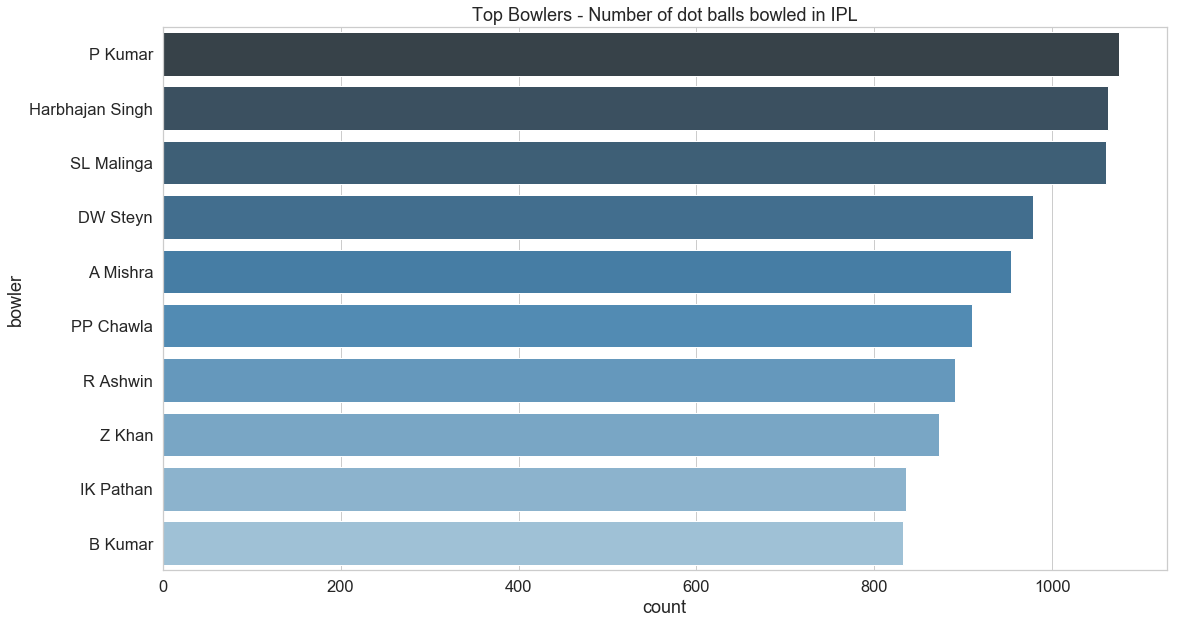

In [294]:
data = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x = 'total_runs', y = 'bowler', data = data[:10], palette="Blues_d")
ax.set_xlabel("count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")

Pravin Kumar is the one with more number of dot balls followed by Harbhajan and Malinga.

Now let us see the bowlers who has bowled more number of extras in IPL.

Text(0.5, 1.0, 'Bowlers with more extras in IPL')

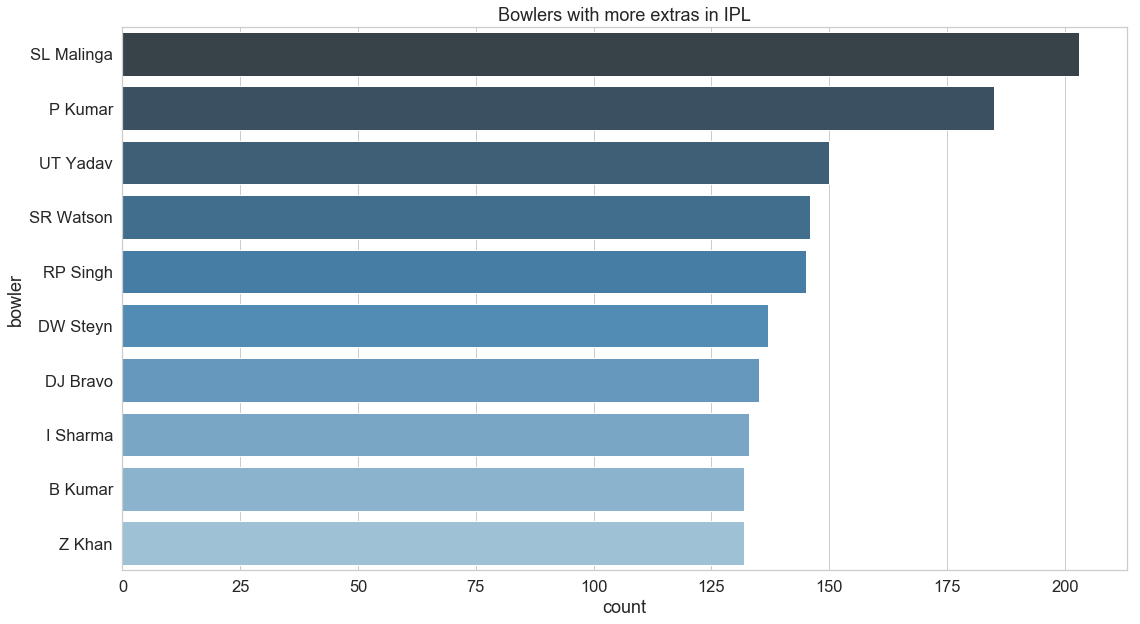

In [281]:
data = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x = 'extra_runs', y = 'bowler', data = data[:10], palette="Blues_d")
ax.set_xlabel("count")
ax.set_title("Bowlers with more extras in IPL")

Malinga tops the chart with more than 200 extra runs followed by Pravin Kumar.

Now let us see most common dismissal types in IPL.

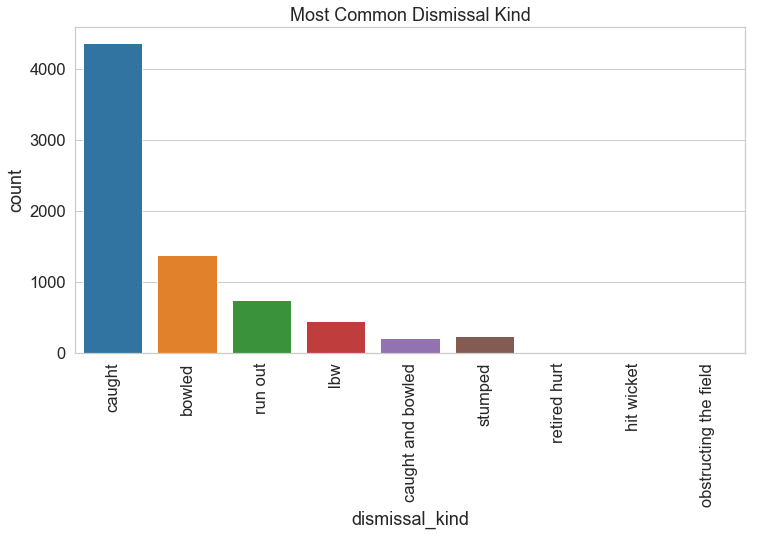

In [295]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='dismissal_kind', data=deliveries)
ax.set_title("Most Common Dismissal Kind")
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!